# Проверка гипотез по увеличению выручки в интернет-магазине — оценка результатов A/B теста
_____
#### Описание проекта

Отделом маркетинга крупного интернет-магазина подготовлен список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
_____
#### Цель проекта

Проект преследует две цели:
* Приоритезировать гипотезы подготовленные отделом маркетинга для увеличения выручки крупного интернет-магазина;
* Запустить A/B тест и проанализировать полученные результаты.
______
#### В этом исследовании представлены следующие данные:

* описание гипотез;
* заказы;
* посещения.
______

#### Данное исследование разделим на несколько частей.

##### Часть 1. Загрузка данных и проверка их на ошибки:
* [1.1. Импорт библиотек, сохранение данных в переменные.](#section_1_1)
* [1.2. Изучение общей информации, нахождение проблем в данных и их исправление.](#section_1_2)

##### Часть 2. Приоритизация гипотез:
* [2.1. Фреймворк ICE.](#section_2_1)
* [2.2. Фреймворк RICE.](#section_2_2)

##### Часть 3. Анализ A/B-теста:
* [3.1. Построение кумулятивных графиков выручки, среднего чека и его относительного изменения, конверсии и ее относительного изменения.](#section_3_1)
* [3.2. Построение точечных графиков количества заказов по пользователям и стоимостей заказов, анализ выбросов.](#section_3_2)
* [3.3. Результаты теста.](#section_3_3)

##### Часть 4. Общие выводы
* [Общие выводы.](#section_4_1)

## Часть 1. Загрузка данных и проверка их на ошибки

<a id='section_1_1'></a>

### 1.1. Импорт библиотек, сохранение данных в переменные.

Импортируем необходимые для исследования библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import warnings
from datetime import datetime
import scipy.stats as stats
warnings.filterwarnings('ignore')


Сохраним имеющиеся данные в переменные.

In [2]:
try:
    hypothesis = pd.read_csv('hypothesis.csv') # данные о гипотезах
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    
try:
    orders = pd.read_csv('orders.csv') # данные о заказах
except:
    orders = pd.read_csv('orders.csv')
    
try:
    visitors = pd.read_csv('visitors.csv') # данные о визитах
except:
    visitors = pd.read_csv('visitors.csv')    


<a id='section_1_2'></a>

### 1.2. Изучение общей информации, нахождение проблем в данных и их исправление.

Подробно изучим общую информацию каждого из трёх датасетов.

##### Изучение общей информации hypothesis

In [3]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Таблица `hypothesis` представляет собой набор гипотез, которые оценены по критерям `Reach`, `Impact`, `Confidence` и `Efforts` по десятибальной шкале от 0 до 10. Эти данные нам нужны для приоритезации гипотез по фреймворкам ICE и RICE, которая будет проведена [во второй части исследования](#section_2_1).
Изучим общую информацию этой таблицы.

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Применив метод `info()` выяснили, что проблем в данных нет.

##### Изучение общей информации orders

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Таблица `orders` содержит данные о заказах, наблюдаемых в период A/B-теста. Данные этого датафрейма будут проанализированы [в третьей части исследования](#section_3_1).
Изучим общую информацию этой таблицы.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В результате применения метода `info()` была определена необходимость изменения тип данных столбца `date` на datetime. Произведем замену типа данных методом `map` и функцией `lambda`.

In [7]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


Проверим принадлежность пользователей к обоим группам.

In [8]:
#d_orders = orders[orders['visitorId'].duplicated()]
orders = orders.sort_values(by='date')
d_orders = orders[['visitorId','group']].drop_duplicates() 
d_orders[d_orders['visitorId'].duplicated()].count()


visitorId    58
group        58
dtype: int64

В `orders` обнаружено 58 пользователей, которые были отнесены к обоим группам. Присвоим таким пользователям группу, которая была у них первее.

In [9]:
d_orders

,visitorId,group
168,1581167209,A
73,2947100995,A
72,1422773200,A
71,8300375,B
70,2328378067,B
...,...,...
1021,4120364173,B
1022,3788724847,A
1023,930758570,B
995,2075883701,B


In [10]:
visitorsID_group = d_orders[d_orders['visitorId'].duplicated(keep='last')]
visitorsID_group

,visitorId,group
71,8300375,B
114,4256040402,A
112,3062433592,B
139,2716752286,B
246,199603092,B
406,1404934699,B
310,3984495233,B
606,3891541246,B
605,2038680547,A
535,3972127743,B


In [11]:
orders = orders.merge(visitorsID_group, on='visitorId', how='left')
orders['group_y'] = orders['group_y'].fillna(value=orders['group_x']) 

In [12]:
orders = orders.drop(['group_x'], axis=1)
orders.columns = ['transactionId', 'visitorId', 'date', 'revenue', 'group']
orders

,transactionId,visitorId,date,revenue,group
0,2065527789,1581167209,2019-08-01,1780,A
1,1295850747,2947100995,2019-08-01,29499,A
2,477940151,1422773200,2019-08-01,700,A
3,3679129301,8300375,2019-08-01,10510,B
4,3574407166,2328378067,2019-08-01,8999,B
...,...,...,...,...,...
1192,969750843,4120364173,2019-08-31,15500,A
1193,2411823395,3788724847,2019-08-31,2610,A
1194,2886170101,930758570,2019-08-31,6674,B
1195,3465107905,2075883701,2019-08-31,2610,B


##### Изучение общей информации visitors

In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Таблица `visitors` содержит данные о визитах, наблюдаемых в период A/B-теста. Данные этого датафрейма также будут проанализированы [в третьей части исследования](#section_3_1).
Изучим общую информацию этой таблицы.

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Также как и в датафрейме `orders` необходимо изменить тип данных для даты таким же способом.

In [15]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Теперь, когда общая информация о данных изучена и исправлены неточности в них, можем приступать к исследовательской части работы.

## Часть 2. Приоритизация гипотез

<a id='section_2_1'></a>

Как было отмечено [в первой части исследования](#section_1_2), в таблице `hypothesis` отражены гипотезы и четыре параметра с оценками критерией от 1 до 10. Произведем приоритизацию гипотез фреймворками `ICE` и `RICE`. 

### 2.1. Фреймворк ICE.

Данный фреймворк расчитывается как отношение произведения параметров `Impact` и `Confidence` к параметру `Efforts`.
Расчитаем фреймворк по формуле и отсортируем его по убыванию.

In [16]:
hypothesis ['ICE_score'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by='ICE_score', ascending=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


### Выводы по значениям `ICE`:

* наивысшим баллом была оценена гипотеза №8, имеет высокий уровень влияния `Impact` и уверенности в оценках `Confidence`, а также средний уровень сложности проверки гипотезы `Efforts`;
* с результатом в 13.3 балла гипотеза №0 занимает второе место, гипотеза имеет наивысшую оценку параметра `Impact`, но на балл ниже оценен `Confidence`, чем у гипотезы №8;
* замыкает тройку самых приоритетных гипотез по фреймворку `ICE` гипотеза №7, оценки параметров `Impact` и `Confidence` которой выше среднего при 5 баллах параметра `Efforts`;
* остальные гипотезы имеют либо высокие значения `Efforts` при низких-средних `Impact` и `Confidence`, кроме гипотезы №4, которая имеет имеет по всем параметрам оценку 1;
* таким образом наиболее приоритетные гипотезы имеют высокие оценки параметров `Impact` и `Confidece` при средних оценках `Efforts`.

<a id='section_2_2'></a>

### 2.2. Фреймворк RICE.

Фреймворк `RICE` расчитывается как отношение произведения параметров `Reach`, `Impact` и `Confidence` к параметру `Efforts`. Расчитаем фреймворк по формуле и отсортируем его по убыванию.

In [17]:
hypothesis ['RICE_score'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='RICE_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score,RICE_score
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Выводы по значениям `RICE`:

* наивысшим баллом была оценена гипотеза №7 с результатом в 112 баллов, которая имеет высокую оценку параметра охвата `Reach` (10), выше среднего уровень влияния `Impact` и уверенности в оценках `Confidence`, а также средний уровень сложности проверки гипотезы `Efforts`;
* следующая по приоритетности гипотеза №2 имеет баллов в два раза меньше (56), чем лидирующая гипотеза. Высокий показатель `Reach`, выше среднего `Confidence` и низкий `Efforts`.   
* с результатом в 40 баллов гипотеза №0 занимает третье место, гипотеза имеет наивысшую оценку параметра `Impact`, при среднем знаменателе `Efforts`;
* наиболее приоритетные гипотезы имеют высокие оценки параметров `Reach`, `Impact` и `Confidece` при средних-низких оценках `Efforts`.

### Общий вывод:

* основное отличие двух фреймворков заключается в том, что `RICE` учитывает оценку охвата пользователей, которых затронет гипотетическое изменение;
* согласно расчётам `RICE` гипотеза №7 является приоритетной, при этом при расчёте `ICE` данная гипотеза была 3-й по приоритетности;
* значения `ICE` высокие у гипотез с высокими оценками влияния и уверенности, при этом у первых двух гипотез имеют низкую оценку охвата, которая не учитавалась при расчете этого фреймворка;
* наиболее приоритетные (топ-3) гипотезы по `ICE` имели среднюю оценку стоимости теста гипотезы;
* одна из наиболее приоритетных (топ-3) гипотез по `RICE` имела низкую оценку стоимости теста гипотезы, остальные имели среднюю.

## Часть 3. Анализ A/B-теста

<a id='section_3_1'></a>

### 3.1. Построение кумулятивных графиков выручки, среднего чека и его относительного изменения, конверсии и ее относительного изменения.

#### Кумулятивная выручка по группам

Для создания кумулятивных данных создаем массив уникальных пар значений дат и групп теста.

In [18]:
datesGroups = orders[['date','group']].drop_duplicates() 

Получаем агрегированные кумулятивные по дням данные о заказах и о посетителях интернет-магазина

In [19]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

In [20]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,43,37,240181,1338
3,2019-08-02,B,46,43,268968,1294
4,2019-08-03,A,67,61,352654,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

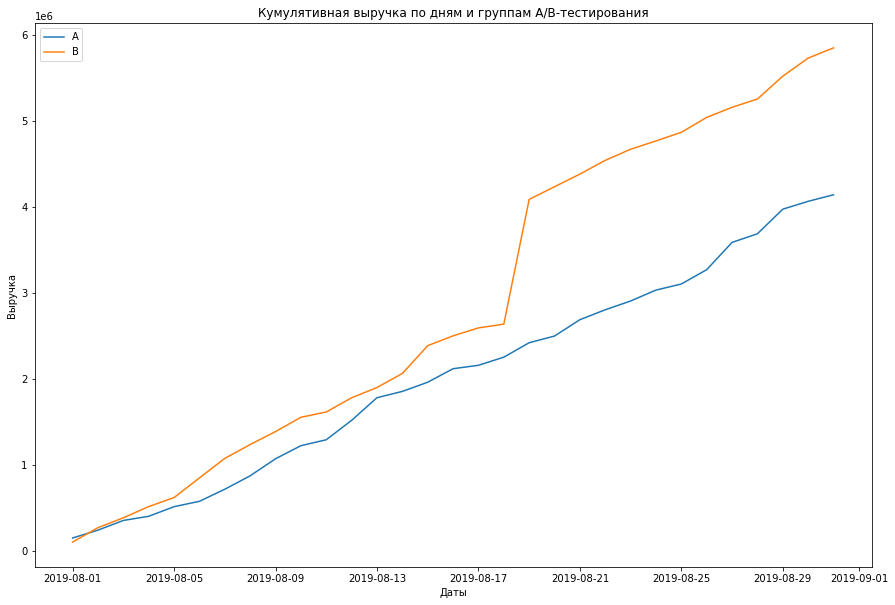

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions']]

plt.rcParams["figure.figsize"] = (15,10)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.legend() 
plt.show()

##### Выводы:
* кумулятивная выручка группы А растет равномерно; 
* график показателя группы В показывает резкий рост во второй половине исследования, до этого график был симметричен графику группы А;
* в группе В вероятно присутствуют аномальные значения, влияющие на график, возможно, что в группе есть очень дорогие заказы;

#### Кумулятивный средний чек по группам

Построем график среднего чека по группам.

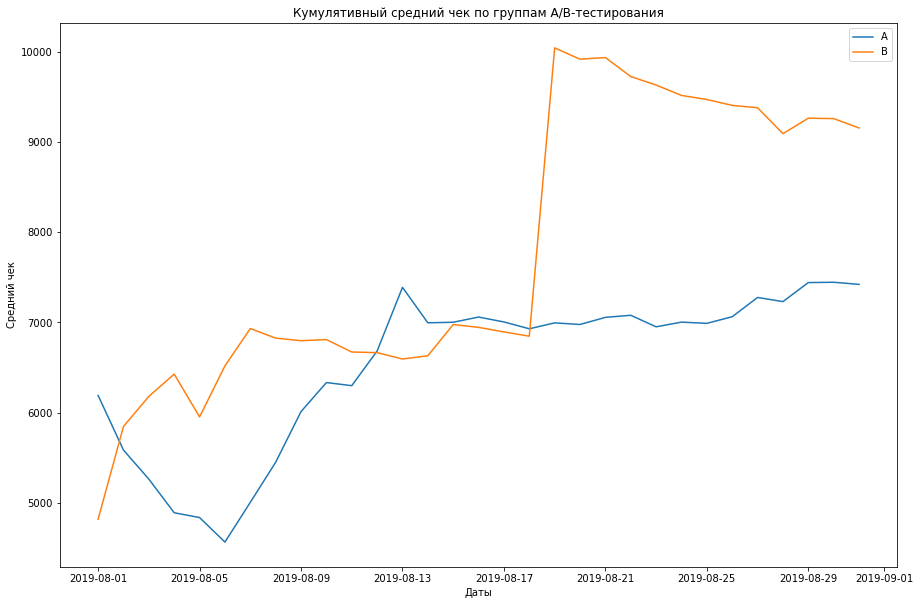

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')
plt.title('Кумулятивный средний чек по группам A/B-тестирования')
plt.xlabel('Даты')
plt.ylabel('Средний чек')
plt.legend() 
plt.show()

##### Выводы:

* в группе В вероятно присутствуют аномальные значения, влияющие на данные;
* в течении всего периода графики групп А и В были неравномерны.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

Для определения относительного изменения кумулятивного среднего чека собираем данные в одном датафрейме, cтроим отношение средних чеков

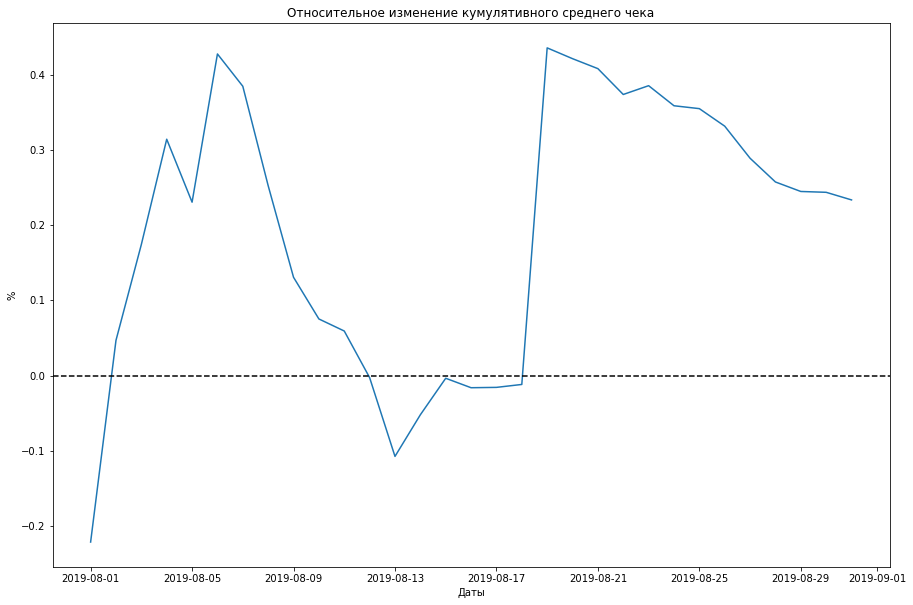

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
 
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Даты')
plt.ylabel('%')
plt.show()

##### Выводы:

* график характеризуется нестабильностью, что означет наличие крупных заказов и выбросов;
* в даты с резкими изменениями вероятно происходили аномальные заказы;
* кумулятивный средний чек группы В в основном был выше, чем у группы А.

#### Кумулятивная конверсия по группам

Визуализируем данные по кумулятивной конверсии по группам.

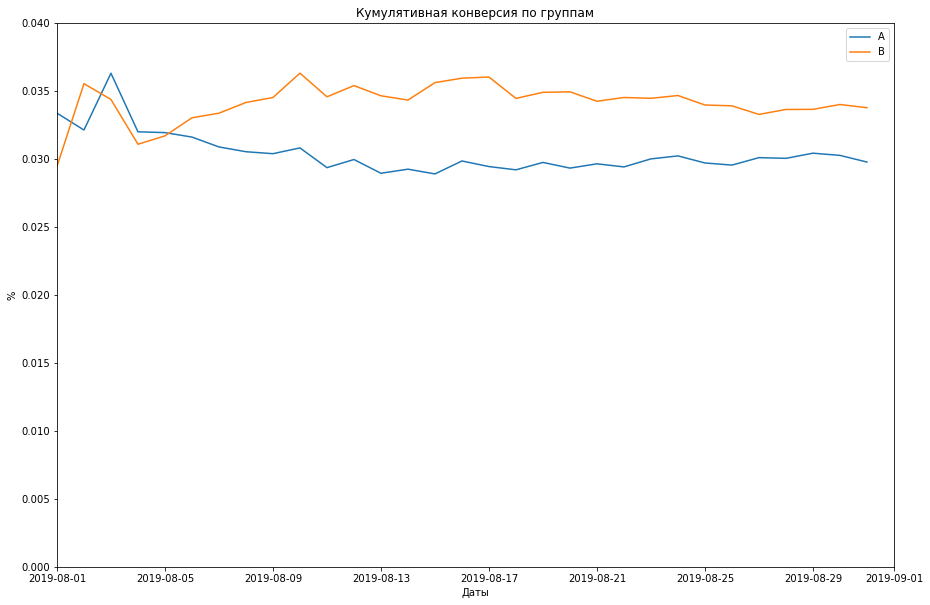

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['transactions']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Даты')
plt.ylabel('%')
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.04]) 
plt.show()

##### Выводы:

* конверсия группы В была выше большую часть периода наблюдения;
* конверсия групп колебалась около одного значения после половины времени наблюдений и зафиксировались.

#### Относительное изменение кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A

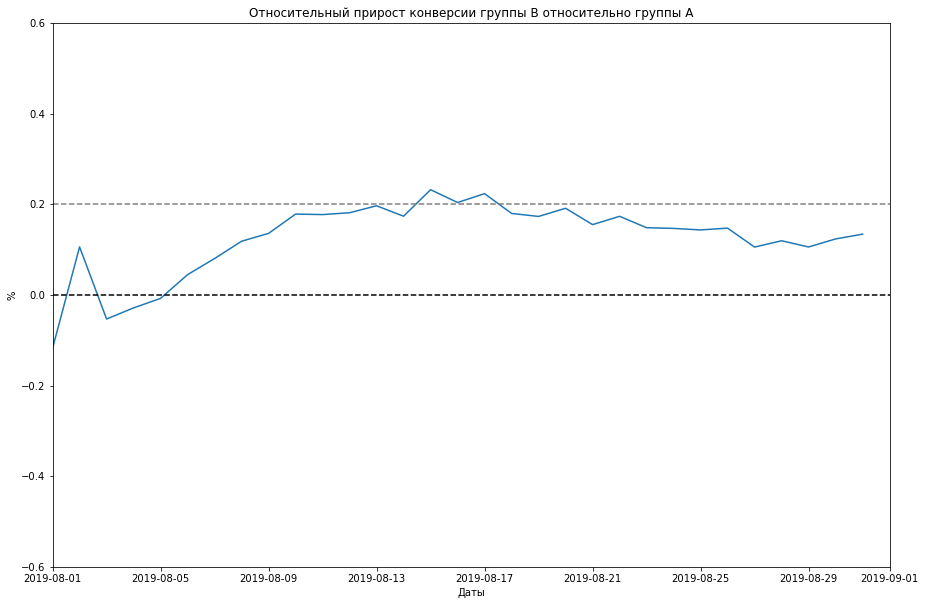

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Даты')
plt.ylabel('%')
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6]) 
plt.show()

##### Выводы:

* кумулятивная конверсия группы В была выше, чем у группы А на протяжении всего времени наблюдения;
* график показывал рост до 20%, далее произошло снижение и во второй половине колебался около 10%.

#### Рекомендации:
По результатам анализа кумулятивных метрик пока нельзя делать однозначные выводы, так как на аномалии влияют на результаты. В связи с этим необходимо избавить данные от выбросов.

<a id='section_3_2'></a>

### 3.2. Построение точечных графиков количества заказов по пользователям и стоимостей заказов, анализ выбросов.

Подсчитаем количество заказов по пользователям и графически отобразим результат точечным графиком.

In [26]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,2065527789,1581167209,2019-08-01,1780,A
1,1295850747,2947100995,2019-08-01,29499,A
2,477940151,1422773200,2019-08-01,700,A
3,3679129301,8300375,2019-08-01,10510,B
4,3574407166,2328378067,2019-08-01,8999,B


In [27]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique}))

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершили 5, 8, 9, 11 заказов. Такие показатели можно назвать аномальными. Построим гистограмму распределения количества заказов на одного пользователя.

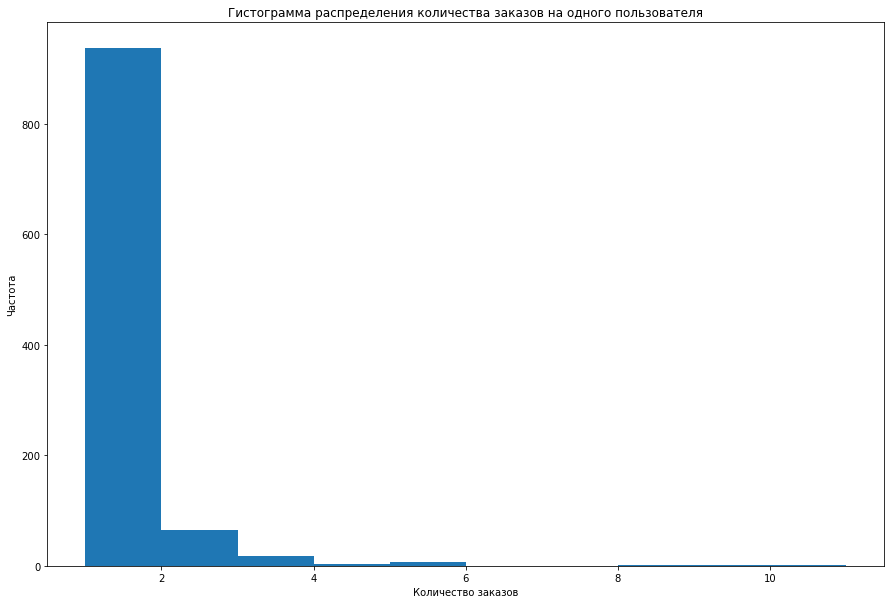

In [28]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.show()

Большинство пользователей совершают в среднем до 2 покупок. Есть показатели в 8 и 10 покупок. Построим точечную диаграмму числа заказов на одного пользователя.

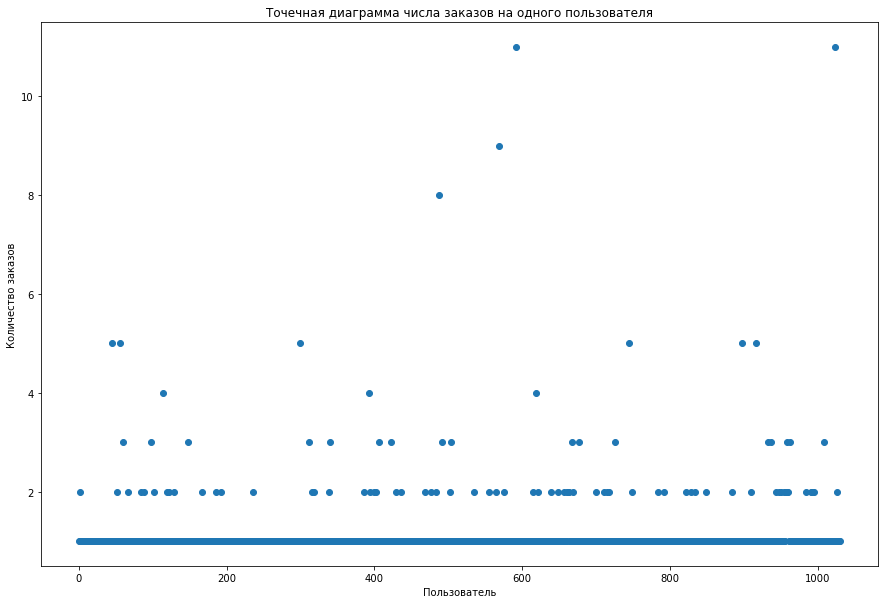

In [29]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.show()

Что и требовалось доказать, много пользователей с 1-2 заказами. Посчитаем выборочные персентили количества заказов на одного пользователя.

In [30]:
print (np.percentile(ordersByUsers['orders'], [95,99]))

[2. 4.]


Не более 5% пользователей оформляли более 2 заказов, не более 1% – 4 заказа. По результатам анализа логично отсеять аномальные показатели более 3 покупок на пользователя.

Построим гистограмму распределения и точечный график стоимостей заказов. 

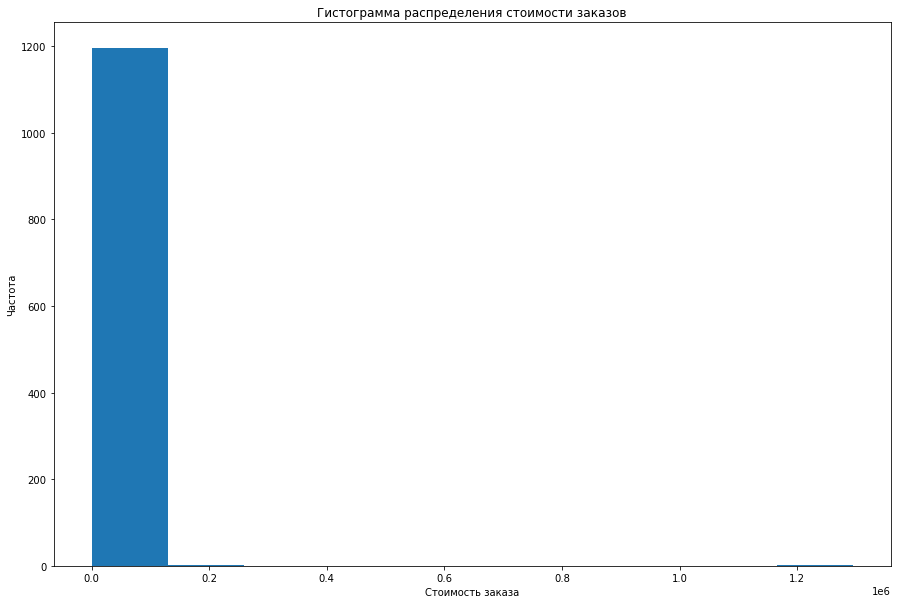

In [31]:
plt.hist(orders['revenue'])
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Стоимость заказа')
plt.ylabel('Частота')
plt.show()

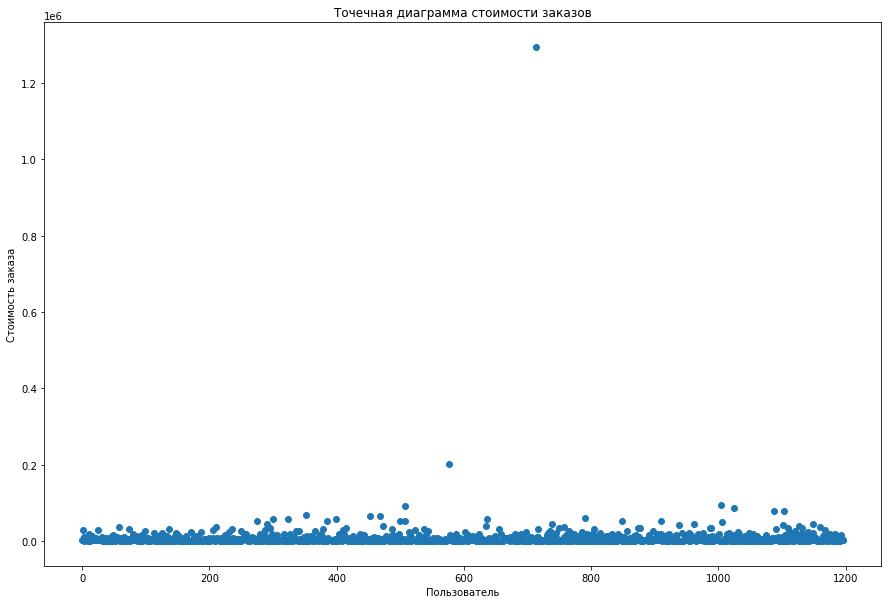

In [32]:
x1_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x1_values, orders['revenue'])
plt.title('Точечная диаграмма стоимости заказов')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказа')
plt.show()

Изменим масштаб по оси Y для наглядности распределений заказов меньше 1 200 000 рублей.

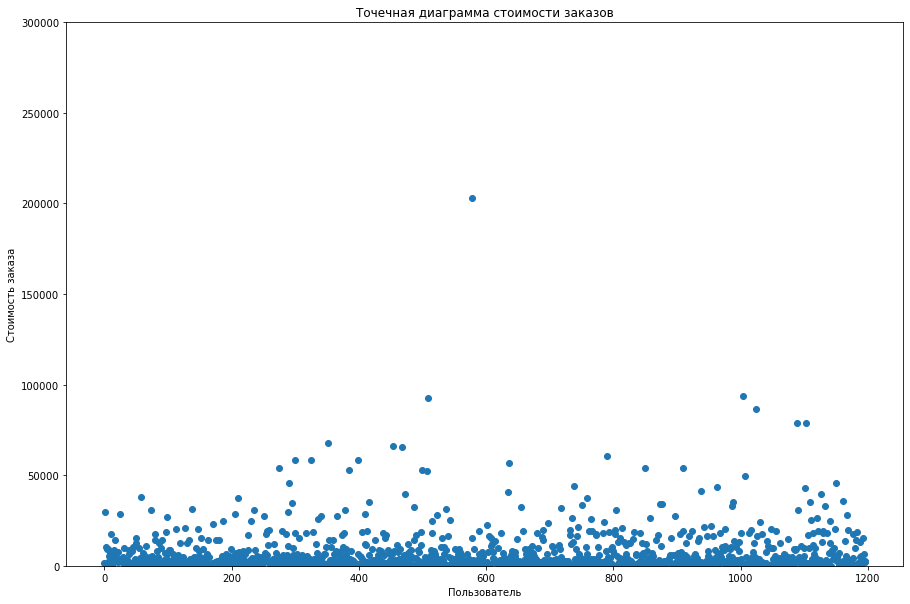

In [33]:
plt.scatter(x1_values, orders['revenue'])
plt.title('Точечная диаграмма стоимости заказов')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 300000)
plt.show()

Большинство заказов не превышают 50 000 рублей, но есть несколько дорогих заказов в 200 000 и более 1 200 000 рублей. Такие заказы могут повлиять на расчеты, поэтому посчитаем 95-й и 99-й персентили стоимостей заказа.

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов стоят дороже 28 000 и не более 1% дороже 59 000. В связи с этим и точечным графиком для стоимостей заказов выберем границу в 30 000 рублей, выше которой значения будут считаться аномальными.

Произведем расчёт статистической значимости различий в конверсии между группами по «сырым» данным.

__Сформулируем нулевую и альтернативные гипотезы.__

Нулевая гипотеза: между группами А и В нет различий в конверсии.

Альтернативная гипотеза, таким образом, гласит обратное – между группами А и В есть различия в конверсии.

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
    )

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB =(
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)

ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("Статистическая значимость различий в конверсии равна: {0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Статистическая значимость различий в конверсии равна: 0.0030
Относительный прирост конверсии группы B: 0.145


P-value меньше 0.05. Значит, мы можем отвергнуть нулевую гипотезу и считать, что в конверсии групп A и B есть различия. Также конверсия группы B выше конверсии группы A на 15%.

Произведем расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем нулевую и альтернативные гипотезы.

Нулевая гипотеза: между группами А и В нет различий по среднему чеку.

Альтернативная гипотеза: между группами А и В есть различия по среднему чеку.

In [36]:
print('Статистическая значимость различий в среднем чеке равна: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Статистическая значимость различий в среднем чеке равна: 0.322
Относительный прирост среднего чека группы B: 0.234


P-value значительно больше 0.05. Значит, нулевая гипотеза не отвергнута, в среднем чеке различий нет. Впрочем, средний чек группы B значительно выше среднего чека группы A на 23%.

#### Выводы по "сырым" данным:
* большинство пользователей совершают в среднем до 2 покупок включительно, определяет, что пользователи, которые заказывали более 3 товаров считаются аномальными;
* большинство заказов не превышают 50 000 рублей, но есть несколько дорогих заказов в 200 000 и более 1 200 000 рублей;
* не более 5% заказов стоят дороже 28 000 рублей и не более 1% дороже 59 000; 
* в связи с изученными фактами для стоимостей заказов была выбрана граница в 30 000 рублей, выше которой значения считаются аномальными;
* P-value конверсии меньше 0.05, то есть в конверсии групп A и B есть различия;
* конверсия группы B выше конверсии группы A на 15%;
* P-value среднего чека значительно больше 0.05, нулевая гипотеза не отвергнута, в среднем чеке различий нет;
* Средний чек группы B значительно выше среднего чека группы A на 23%.



### Анализ "очищенных" от аномалий данных

Произведем очистку данных от аномальных значений с установленными в предыдущем разделе параметрами.

In [37]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape) 
abnormalUsers.head(5)

(61,)


468     148427295
27      199603092
1132    204675465
20      237748145
1101    358944393
dtype: int64

Получилось 26 аномальных пользователей.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Для начала подготовим выборки количества заказов по пользователям по группам теста.

Нулевая гипотеза: между группами А и В нет различий в конверсии.

Альтернативная гипотеза, таким образом, гласит обратное – между группами А и В есть различия в конверсии.

In [38]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [39]:
print('Статистическая значимость различий в конверсии в очищенных данных равна: {0:.4f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B по очищенным данным: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Статистическая значимость различий в конверсии в очищенных данных равна: 0.0059
Относительный прирост конверсии группы B по очищенным данным: 0.161


P-value все также меньше 0.05. Значит, мы можем отвергнуть нулевую гипотезу и считать, что в конверсии групп A и B есть различия и в очищенных от аномалий данных. Также конверсия группы B осталась выше конверсии группы A на 16%.

График различия конверсии между группами 

In [40]:
orders_clear = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

In [41]:
datesGroups_clear = orders_clear[['date','group']].drop_duplicates() 

ordersAggregated_clear = datesGroups_clear.apply(
    lambda x: orders_clear[
        np.logical_and(
            orders_clear['date'] <= x['date'], orders_clear['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated_clear = datesGroups_clear.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


In [42]:
cumulativeData_clear = ordersAggregated_clear.merge(visitorsAggregated_clear, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_clear.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

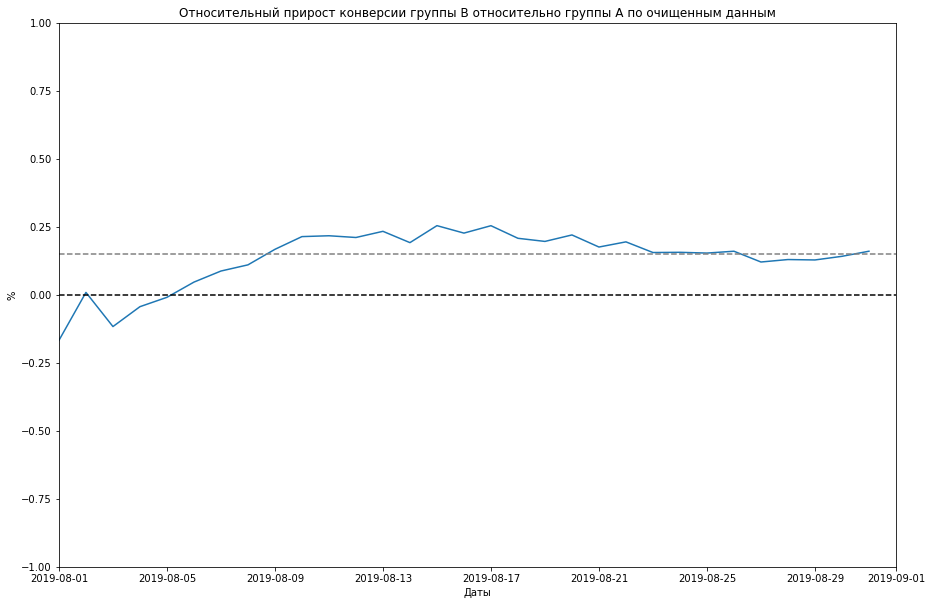

In [43]:
# считаем кумулятивную конверсию
cumulativeData_clear['conversion'] = cumulativeData_clear['transactions']/cumulativeData_clear['visitors']

# отделяем данные по группе A
cumulativeDataA_clear = cumulativeData_clear[cumulativeData_clear['group']=='A']

# отделяем данные по группе B
cumulativeDataB_clear = cumulativeData_clear[cumulativeData_clear['group']=='B']

mergedCumulativeConversions_clear = cumulativeDataA_clear[['date','conversion']].merge(cumulativeDataB_clear[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions_clear['date'], mergedCumulativeConversions_clear['conversionB']/mergedCumulativeConversions_clear['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A по очищенным данным')
plt.xlabel('Даты')
plt.ylabel('%')
plt.axis(["2019-08-01", '2019-09-01', -1, 1]) 
plt.show()

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения в 0.15.

Посчитаем статистическую значимость различий в среднем чеке между группами теста по очищенным данным.

Нулевая гипотеза: между группами А и В нет различий по среднему чеку.

Альтернативная гипотеза: между группами А и В есть различия по среднему чеку.

In [44]:
print(
    'Статистическая значимость различий в среднем чеке по очищенным данным равна: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B по очищенным данным: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Статистическая значимость различий в среднем чеке по очищенным данным равна: 0.215
Относительный прирост среднего чека группы B по очищенным данным: -0.062


P-value увеличился, что означает, что мы не можем отвергнуть нулевую гипотезу. Разница между сегментами сократилась с 23% до -6%, то есть средний чек группы B стал ниже среднего чека группы B.

График различия среднего чека 

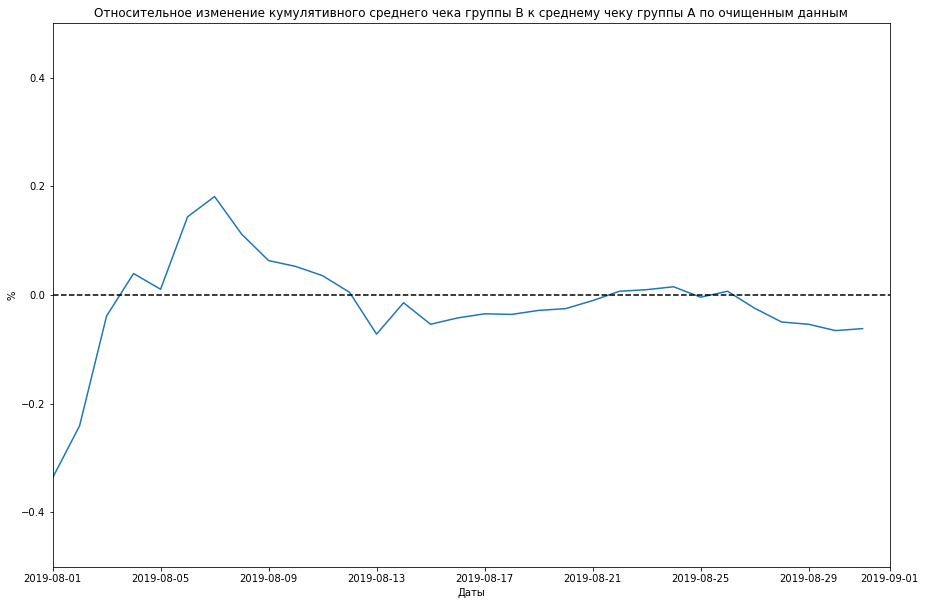

In [45]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_clear = cumulativeData_clear[cumulativeData_clear['group']=='A'][['date','revenue', 'transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_clear = cumulativeData_clear[cumulativeData_clear['group']=='B'][['date','revenue', 'transactions']]

mergedCumulativeRevenue_clear = cumulativeRevenueA_clear.merge(cumulativeRevenueB_clear, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue_clear['date'], (mergedCumulativeRevenue_clear['revenueB']/mergedCumulativeRevenue_clear['transactionsB'])/(mergedCumulativeRevenue_clear['revenueA']/mergedCumulativeRevenue_clear['transactionsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к среднему чеку группы A по очищенным данным')
plt.xlabel('Даты')
plt.ylabel('%')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5]) 
plt.show()

График различия среднего чека по чистым данным колеблется: нельзя сказать, что средний чек группы B стабильно выше среднего чека группы A. Сделать из этого графика определённые выводы нельзя.

#### Выводы по "чистым" данным:
* P-value конверсии после "чистки" данных осталось меньше 0.05, то есть в конверсии групп A и B есть различия по очищенным данным;
* конверсия группы B выше конверсии группы A на 15%, после "чистки" этот показатель не изменился;
* P-value среднего чека также значительно больше 0.05, нулевая гипотеза не отвергнута, в среднем чеке различий нет по "чистым" данным;
* Средний чек группы B стал ниже среднего чека группы A после "чистки" данных на 6%.



<a id='section_3_3'></a>

### 3.3. Результаты теста.

####   Исходя из результатов теста следует признать его неуспешным – нельзя утвержать, что группа B явно лучше группы A: 
* наблюдается статистически значимое различие по конверсии, как по "сырым", так и по "очищенным" данным, группа B статистически лучше группы А по конверсии;
* нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* относительный прирост среднего чека группы B ниже чем у группы A и составил -2%;
* несмотря на то, что в период наблюдения конверсия группы B была выше конверсии группы A, динамика относительного изменения среднего чека группы B к группе А была нестабильной.

#### Таким образом, следует остановить тест, зафиксировать отсутствие различий между группами.

#### Общий вывод

* в рамках работы по была изучена общая информация по всем данным исследования; 
* исправлены типы данных для дат в таблицах `orders` и `visitors`;
* исправлена проблема с нахождением 58 пользователей в двух группах;
* произведена приоритезация гипотез по фреймворакм `ICE` и `RICE`;
* согласно расчётам RICE гипотеза №7 является приоритетной, при этом при расчёте ICE данная гипотеза была 3-й по приоритетности;
* значения ICE высокие у гипотез с высокими оценками влияния и уверенности, при этом у первых двух гипотез имеют низкую оценку охвата, которая не учитавалась при расчете этого фреймворка;
* наиболее приоритетные (топ-3) гипотезы по ICE имели среднюю оценку стоимости теста гипотезы;
* одна из наиболее приоритетных (топ-3) гипотез по RICE имела низкую оценку стоимости теста гипотезы, остальные имели среднюю.
* кумулятивная выручка группы А растет равномерно;
* график показателя группы В показывает резкий рост во второй половине исследования, до этого график был симметричен графику группы А;
* в группе В присутствали аномальные значения, влияющие на график;
* в течении всего периода графики групп А и В по среднему чеку были неравномерны;
* кумулятивный средний чек группы В в основном был выше, чем у группы А;
* конверсия группы В была выше большую часть периода наблюдения;
* кумулятивная конверсия группы В была выше, чем у группы А на протяжении всего времени наблюдения;
* большинство пользователей совершают в среднем до 2 покупок включительно, определяет, что пользователи, которые заказывали более 3 товаров считаются аномальными;
* большинство заказов не превышают 50 000 рублей, но есть несколько дорогих заказов в 200 000 и более 1 200 000 рублей;
* не более 5% заказов стоят дороже 28 000 рублей и не более 1% дороже 59 000; 
* в связи с изученными фактами для стоимостей заказов была выбрана граница в 30 000 рублей, выше которой значения считаются аномальными;
* P-value конверсии меньше 0.05, то есть в конверсии групп A и B есть различия;
* конверсия группы B выше конверсии группы A на 15%;
* P-value среднего чека значительно больше 0.05, нулевая гипотеза не отвергнута, в среднем чеке различий нет;
* средний чек группы B значительно выше среднего чека группы A на 23%;
* P-value конверсии после "чистки" данных осталось меньше 0.05, то есть в конверсии групп A и B есть различия по очищенным данным;
* конверсия группы B выше конверсии группы A на 15%, после "чистки" этот показатель не изменился;
* P-value среднего чека также значительно больше 0.05, нулевая гипотеза не отвергнута, в среднем чеке различий нет по "чистым" данным;
* средний чек группы B стал ниже среднего чека группы A после "чистки" данных на 6%.
* удаление выбросов на проверку статистических гипотез не повлияло;
* результаты теста позволяют признать его неуспешным, так как группа В не лучше группы А;
* таким образом, следует остановить тест, зафиксировать отсутствие различий между группами.